In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Keerthika\\ML\\data sets\\income.csv")
data


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


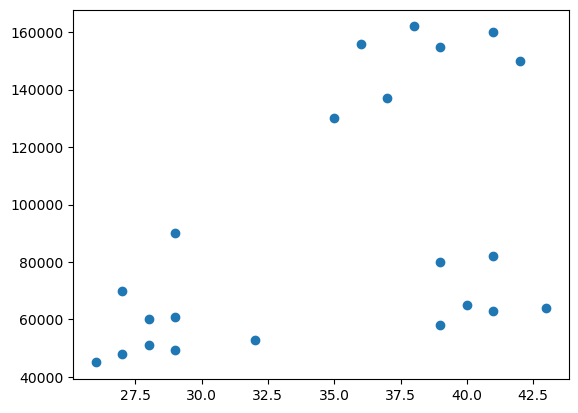

In [3]:
plt.scatter(data['Age'], data['Income($)'])

In [4]:
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data['Income($)'] = scaler.fit_transform(data[['Income($)']])
data

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


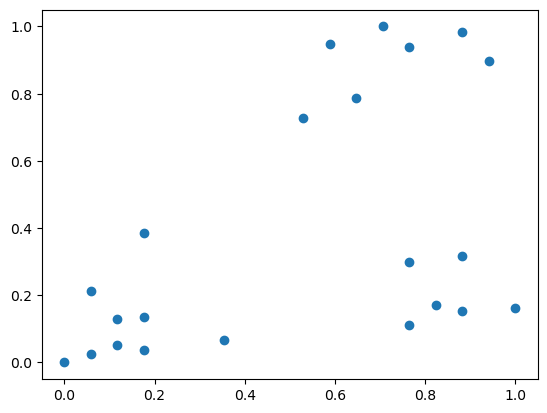

In [5]:
plt.scatter(data['Age'], data['Income($)'])

In [6]:
sse = []
k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)  # Set 'n_init' explicitly to avoid the warning
    km.fit(data[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [7]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2664030124668416,
 0.21055478995472493,
 0.17681044133887713,
 0.13265419827245162,
 0.10188787724979426]

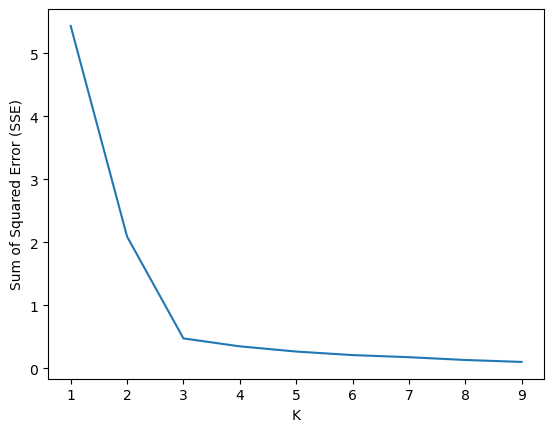

In [8]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error (SSE)')
plt.plot(k_rng, sse)
plt.show()

In [12]:
k=KMeans(n_clusters=3)
data['cluster']=k.fit_predict(data[['Age','Income($)']])
data

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


Text(0, 0.5, 'Income($)')

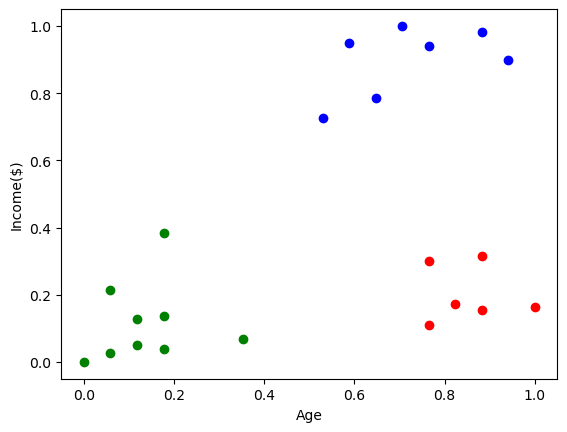

In [15]:
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df3=data[data.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color="green")
plt.scatter(df2['Age'],df2['Income($)'],color="blue")
plt.scatter(df3['Age'],df3['Income($)'],color="red")

plt.xlabel('Age')
plt.ylabel('Income($)')

In [22]:
inputs=data.drop(['cluster'],axis='columns')
target=data.cluster
target

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    2
17    2
18    2
19    2
20    2
21    2
Name: cluster, dtype: int32

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [25]:
len(x_train)

17

In [26]:
len(x_test)

5

In [29]:
data = data.drop(['Name'], axis='columns', errors='ignore')

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(x_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%
